In [1]:
import os
import numpy as np
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
subspace_struct_list=['234111','2222211','333111','441111','12x1']
num_iter=11
num_subspace_struct=len(subspace_struct_list)
isi_um=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
isi_ummm=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
isi_mm=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
aux_um=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
aux_ummm=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))
aux_mm=np.zeros((num_subspace_struct,num_subspace_struct,num_iter))

for i,ss in enumerate(subspace_struct_list):
    if ss == '12x1':
        num_iter=1
    else:
        num_iter=11

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um.mat"))
    isi_um[i,i,:] = np.squeeze(data['isi_um'])
    if ss == '12x1':
        a = np.squeeze(data['aux_um'][2,:]) # scale control off
        aux_um[i,i,:] = a
    else:
        a = np.squeeze(data['aux_um'][1,:])
        aux_um[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","loss_um_scoff.mat"))
    # aux_um[i,i,:] = np.squeeze(data['loss'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm.mat"))
    isi_ummm[i,i,:] = np.squeeze(data['isi_ummm'])
    if ss == '12x1':
        a = np.squeeze(data['aux_ummm'][2,:]) # scale control off
        aux_ummm[i,i,:] = a
    else:
        a = np.squeeze(data['aux_ummm'][1,:])
        aux_ummm[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","loss_ummm_scoff.mat"))
    # aux_ummm[i,i,:] = np.squeeze(data['loss'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","mm.mat"))
    isi_mm[i,i,:] = np.squeeze(data['isi_mm'])
    if ss == '12x1':
        a = np.squeeze(data['aux_mm'][2,:]) # scale control off
        aux_mm[i,i,:] = a
    else:
        a = np.squeeze(data['aux_mm'][1,:])
        aux_mm[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    
    incorrect_ss_list = list(range(num_subspace_struct))
    incorrect_ss_list.remove(i)
    for j in incorrect_ss_list:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","um.mat"))
        isi_um[i,j,:] = np.squeeze(data['isi_um_s1'])
        if ss == '12x1' or subspace_struct_list[j] == '12x1':
            a = np.squeeze(data['aux_um_s1'][2,:]) # scale control off
            aux_um[i,j,:] = a
        else:
            a = np.squeeze(data['aux_um_s1'][1,:])
            aux_um[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])
        # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","loss_um_scoff.mat"))
        # aux_um[i,j,:] = np.squeeze(data['loss'])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","ummm.mat"))
        isi_ummm[i,j,:] = np.squeeze(data['isi_ummm_s1'])
        if ss == '12x1' or subspace_struct_list[j] == '12x1':
            a = np.squeeze(data['aux_ummm_s1'][2,:]) # scale control off
            aux_ummm[i,j,:] = a
        else:
            a = np.squeeze(data['aux_ummm_s1'][1,:])
            aux_ummm[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])
        # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","loss_ummm_scoff.mat"))
        # aux_ummm[i,j,:] = np.squeeze(data['loss'])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","mm.mat"))
        isi_mm[i,j,:] = np.squeeze(data['isi_mm_s1'])
        if ss == '12x1' or subspace_struct_list[j] == '12x1':
            a = np.squeeze(data['aux_mm_s1'][2,:]) # scale control off
            aux_mm[i,j,:] = a
        else:
            a = np.squeeze(data['aux_mm_s1'][1,:])
            aux_mm[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])

In [3]:
isi_um_min = np.min(isi_um,axis=2)
isi_ummm_min = np.min(isi_ummm,axis=2)
isi_mm_min = np.min(isi_mm,axis=2)

isi_um_min_ind = np.argmin(isi_um,axis=2)
isi_ummm_min_ind = np.argmin(isi_ummm,axis=2)
isi_mm_min_ind = np.argmin(isi_mm,axis=2)

aux_um_min = np.min(aux_um,axis=2)
aux_ummm_min = np.min(aux_ummm,axis=2)
aux_mm_min = np.min(aux_mm,axis=2)

print(aux_um_min)
print(aux_ummm_min)
print(aux_mm_min)

aux_um_min_ind = np.argmin(aux_um,axis=2)
aux_ummm_min_ind = np.argmin(aux_ummm,axis=2)
aux_mm_min_ind = np.argmin(aux_mm,axis=2)

print(aux_um_min_ind)
print(aux_ummm_min_ind)
print(aux_mm_min_ind)

[[42.69163868 42.88364054 42.76165113 42.99218699 43.23046028]
 [42.64939864 42.2999005  42.85097599 42.8680394  42.91784402]
 [42.71959192 42.85787947 42.63506397 43.0995388  43.25556941]
 [43.09076913 43.23929925 43.17352401 42.9764492  43.5066937 ]
 [43.40134546 43.00984864 43.49734351 43.77286955 42.02061398]]
[[42.67687912 42.86470472 42.75052939 43.03843311 43.11060025]
 [42.65588586 42.22912355 42.62781847 42.76436291 42.74869679]
 [42.6947989  42.86178266 42.62022519 43.04032558 43.12638124]
 [42.68928778 42.39724179 41.1201708  39.93684739 33.60869636]
 [43.40503574 42.96620381 43.38769255 43.97529648 42.0051631 ]]
[[23.82415208 23.94737096 23.81949718 24.02788477 24.27426897]
 [27.76622709 27.44226515 27.80274844 28.16152244 28.18243705]
 [23.93111632 24.02946237 23.7786396  24.03622762 24.22868348]
 [17.26454813 18.66018158 17.28986256 17.5637204  19.73114211]
 [36.76416655 36.35926785 36.75794684 37.26485634 35.26170709]]
[[ 7  7  7  2  0]
 [ 9  5  4  7  0]
 [ 3  7 10  4  0

In [4]:
# use loss to grab ISI
isi_um_min_loss = np.zeros((num_subspace_struct,num_subspace_struct))
isi_ummm_min_loss = np.zeros((num_subspace_struct,num_subspace_struct))
isi_mm_min_loss = np.zeros((num_subspace_struct,num_subspace_struct))

for i in range(num_subspace_struct):
    for j in range(num_subspace_struct):
        isi_um_min_loss[i,j] = isi_um[i,j,aux_um_min_ind[i,j]]
        isi_ummm_min_loss[i,j] = isi_ummm[i,j,aux_ummm_min_ind[i,j]]
        isi_mm_min_loss[i,j] = isi_mm[i,j,aux_mm_min_ind[i,j]]

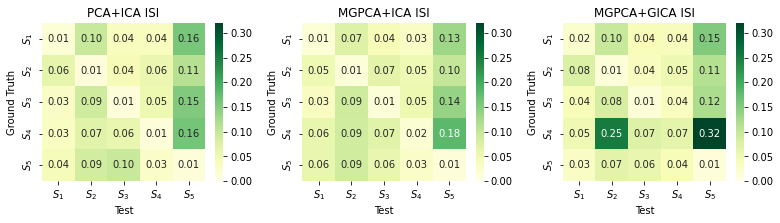

In [12]:
label=["$S_1$","$S_2$","$S_3$","$S_4$","$S_5$"]
fig,axes=plt.subplots(1,3,figsize=(11,3.2))

sns.heatmap(isi_um_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.32,xticklabels=label,yticklabels=label,ax=axes[0])
# axes[0].set_title("UA ISI")
axes[0].set_title("PCA+ICA ISI")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(isi_ummm_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.32,xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MGPCA+ICA ISI")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

sns.heatmap(isi_mm_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.32,xticklabels=label,yticklabels=label,ax=axes[2])
axes[2].set_title("MGPCA+GICA ISI")
axes[2].set_ylabel("Ground Truth")
axes[2].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation_isi_gica_iva.pdf")
# plt.savefig("simulation_isi_gica_iva_s4seed14.pdf")
plt.savefig("simulation_isi_gica_iva.png",dpi=500)

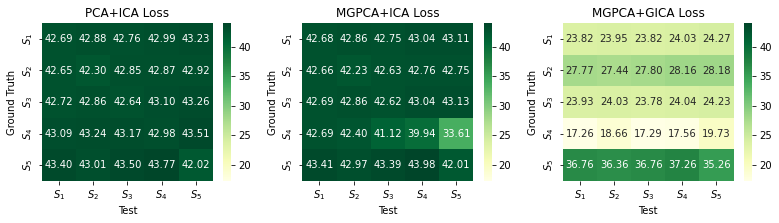

In [11]:
valmax = np.max([aux_um_min, aux_ummm_min, aux_mm_min])
valmin = np.min([aux_um_min, aux_ummm_min, aux_mm_min])

label=["$S_1$","$S_2$","$S_3$","$S_4$","$S_5$"]
fig,axes=plt.subplots(1,3,figsize=(11,3.2))

sns.heatmap(aux_um_min,cmap="YlGn",annot=True,fmt=".2f",vmin=valmin,vmax=valmax,xticklabels=label,yticklabels=label,ax=axes[0])
# axes[0].set_title("UA ISI")
axes[0].set_title("PCA+ICA Loss")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(aux_ummm_min,cmap="YlGn",annot=True,fmt=".2f",vmin=valmin,vmax=valmax,xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MGPCA+ICA Loss")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

sns.heatmap(aux_mm_min,cmap="YlGn",annot=True,fmt=".2f",vmin=valmin,vmax=valmax,xticklabels=label,yticklabels=label,ax=axes[2])
axes[2].set_title("MGPCA+GICA Loss")
axes[2].set_ylabel("Ground Truth")
axes[2].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation_isi_gica_iva.pdf")
# plt.savefig("simulation_isi_gica_iva_s4seed14.pdf")
plt.savefig("simulation_loss_gica_iva.png",dpi=500)

In [48]:
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
subspace_struct_list=['234111','2222211','333111','441111','12x1']

corr = np.zeros((num_subspace_struct,8,12,12))

for i,ss in enumerate(subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","A.mat"))
    A=np.squeeze(data['A'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um_W.mat"))
    W1=np.squeeze(data['W1'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm_W.mat"))
    W2=np.squeeze(data['W2'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","mm_W.mat"))
    W3=np.squeeze(data['W3'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","W.mat"))
    W=np.squeeze(data['W'])

    corr[i,0] = W1[0]@A[0]
    corr[i,1] = W1[1]@A[1]
    corr[i,2] = W2[0]@A[0]
    corr[i,3] = W2[1]@A[1]
    corr[i,4] = W3[0]@A[0]
    corr[i,5] = W3[1]@A[1]
    corr[i,6] = W[0]@A[0]
    corr[i,7] = W[1]@A[1]

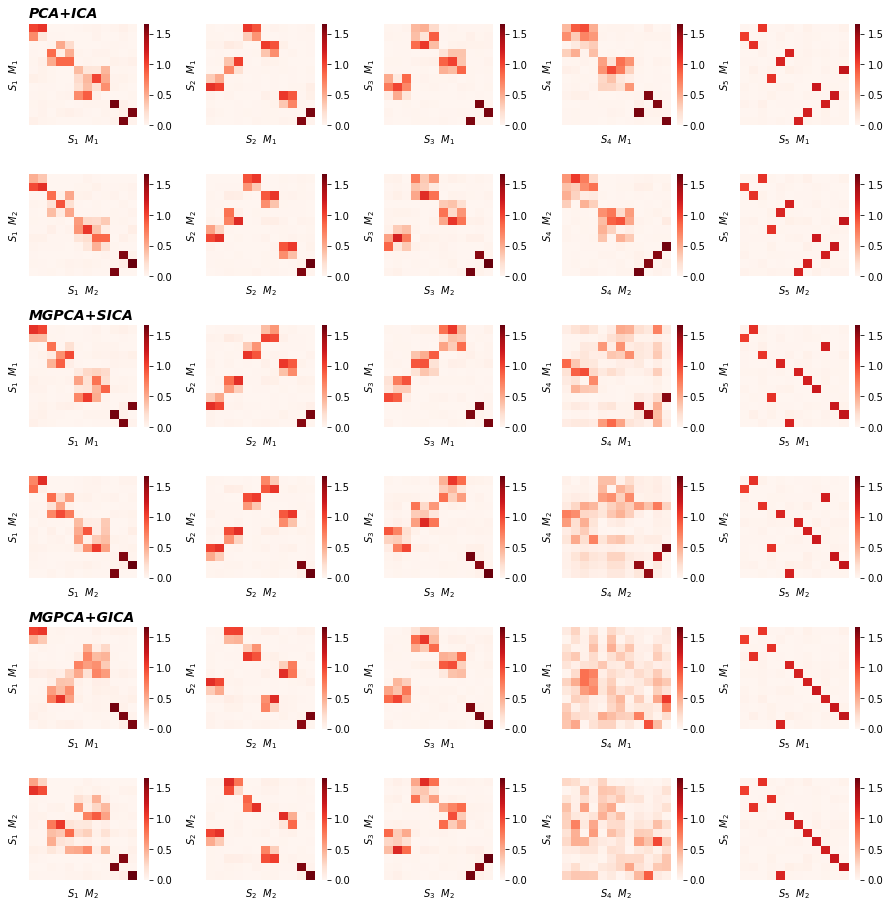

In [49]:
# cmap_list=["YlGn","YlGn","Purples","Purples"]
corrabsmax = np.max(np.abs(corr))
analysis_list = ["UA"]*2+["MSIVA"]*2+["MGPCA+GICA"]*2
fig,axes=plt.subplots(6,num_subspace_struct,figsize=(2.5*num_subspace_struct,2.12*6))

for i in range(num_subspace_struct):
    for j in range(6):
        sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=corrabsmax,ax=axes[j,i]) #Purples
        # sns.heatmap(corr[i,j],cmap="coolwarm",vmin=-corrabsmax,vmax=corrabsmax,ax=axes[j,i])
        # axes[j,i].set_title(f"{analysis_list[j]}  $S_{i+1}$  $M_{j%2+1}$")#self-correlation($Y$)
        # axes[j,i].set_axis_off()
        axes[j,i].set_xlabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_ylabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            # axes[j,i].set_title("UA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
            axes[j,i].set_title("PCA+ICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 2:
            # axes[j,i].set_title("MSIVA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
            axes[j,i].set_title("MGPCA+ICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 4:
            axes[j,i].set_title("MGPCA+GICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")

plt.tight_layout()
# plt.savefig("simulation_absWA_gica_iva.pdf")
plt.savefig("simulation_absWA_gica_iva_s4seed14.pdf")

In [37]:
# ground truth vs test
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
correct_subspace_struct_list=['234111','2222211','333111','441111']
incorrect_subspace_struct='12x1'
corr = np.zeros((len(correct_subspace_struct_list),8,12,12))

for i,ss in enumerate(correct_subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","A.mat"))
    A=np.squeeze(data['A'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{incorrect_subspace_struct}","um_W.mat"))
    W1=np.squeeze(data['W1'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{incorrect_subspace_struct}","ummm_W.mat"))
    W2=np.squeeze(data['W2'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{incorrect_subspace_struct}","mm_W.mat"))
    W3=np.squeeze(data['W3'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","W.mat"))
    W=np.squeeze(data['W'])

    corr[i,0] = W1[0]@A[0]
    corr[i,1] = W1[1]@A[1]
    corr[i,2] = W2[0]@A[0]
    corr[i,3] = W2[1]@A[1]
    corr[i,4] = W3[0]@A[0]
    corr[i,5] = W3[1]@A[1]
    corr[i,6] = W[0]@A[0]
    corr[i,7] = W[1]@A[1]

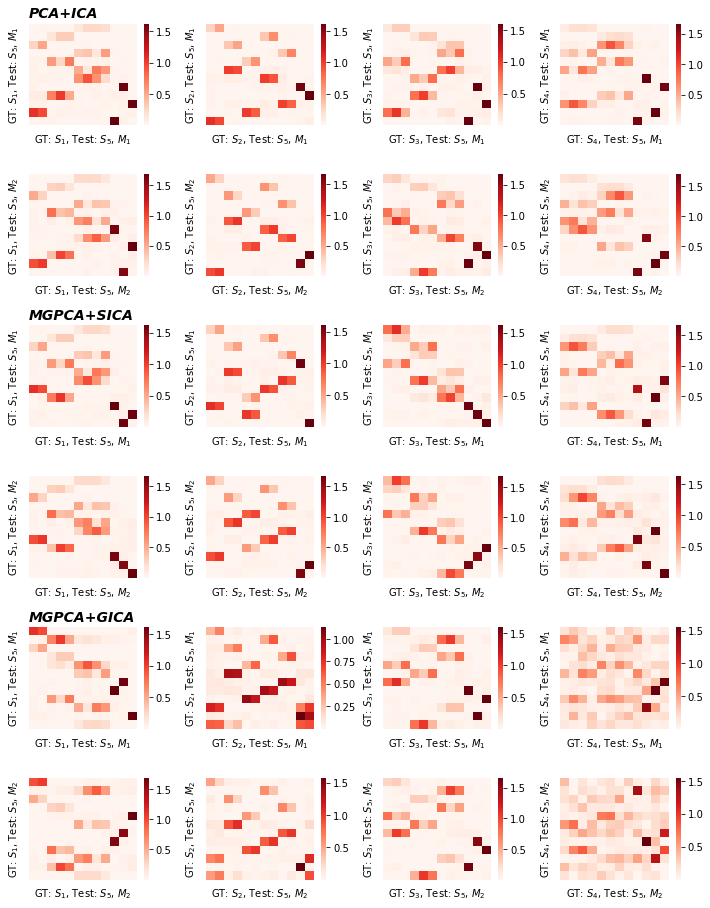

In [38]:
corrabsmax = np.max(np.abs(corr))
analysis_list = ["UA"]*2+["MSIVA"]*2+["MGPCA+GICA"]*2
fig,axes=plt.subplots(6,len(correct_subspace_struct_list),figsize=(2.5*len(correct_subspace_struct_list),2.12*6))
ss_id = [5,5,5,5]

for i in range(len(correct_subspace_struct_list)):
    for j in range(6):
        sns.heatmap(np.abs(corr[i,j]),cmap="Reds",ax=axes[j,i]) #Purples vmin=0,vmax=corrabsmax,
        axes[j,i].set_xlabel(f"GT: $S_{i+1}$, Test: $S_{ss_id[i]}$, $M_{j%2+1}$")
        axes[j,i].set_ylabel(f"GT: $S_{i+1}$, Test: $S_{ss_id[i]}$, $M_{j%2+1}$")
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            axes[j,i].set_title("PCA+ICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 2:
            axes[j,i].set_title("MGPCA+ICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 4:
            axes[j,i].set_title("MGPCA+GICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")

plt.tight_layout()
plt.savefig("simulation_absWA_gica_iva_incorrectS5.pdf")

In [35]:
# ground truth vs test
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
correct_subspace_struct='12x1'
incorrect_subspace_struct_list=['234111','2222211','333111','441111','12x1']
corr = np.zeros((len(incorrect_subspace_struct_list),8,12,12))

for i,ss in enumerate(incorrect_subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}","A.mat"))
    A=np.squeeze(data['A'])

    if ss == correct_subspace_struct:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}","um_W.mat"))
        W1=np.squeeze(data['W1'])
        
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}","ummm_W.mat"))
        W2=np.squeeze(data['W2'])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}","mm_W.mat"))
        W3=np.squeeze(data['W3'])
    else:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}_incorrect{ss}","um_W.mat"))
        W1=np.squeeze(data['W1'])
        
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}_incorrect{ss}","ummm_W.mat"))
        W2=np.squeeze(data['W2'])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}_incorrect{ss}","mm_W.mat"))
        W3=np.squeeze(data['W3'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}","W.mat"))
    W=np.squeeze(data['W'])

    corr[i,0] = W1[0]@A[0]
    corr[i,1] = W1[1]@A[1]
    corr[i,2] = W2[0]@A[0]
    corr[i,3] = W2[1]@A[1]
    corr[i,4] = W3[0]@A[0]
    corr[i,5] = W3[1]@A[1]
    corr[i,6] = W[0]@A[0]
    corr[i,7] = W[1]@A[1]

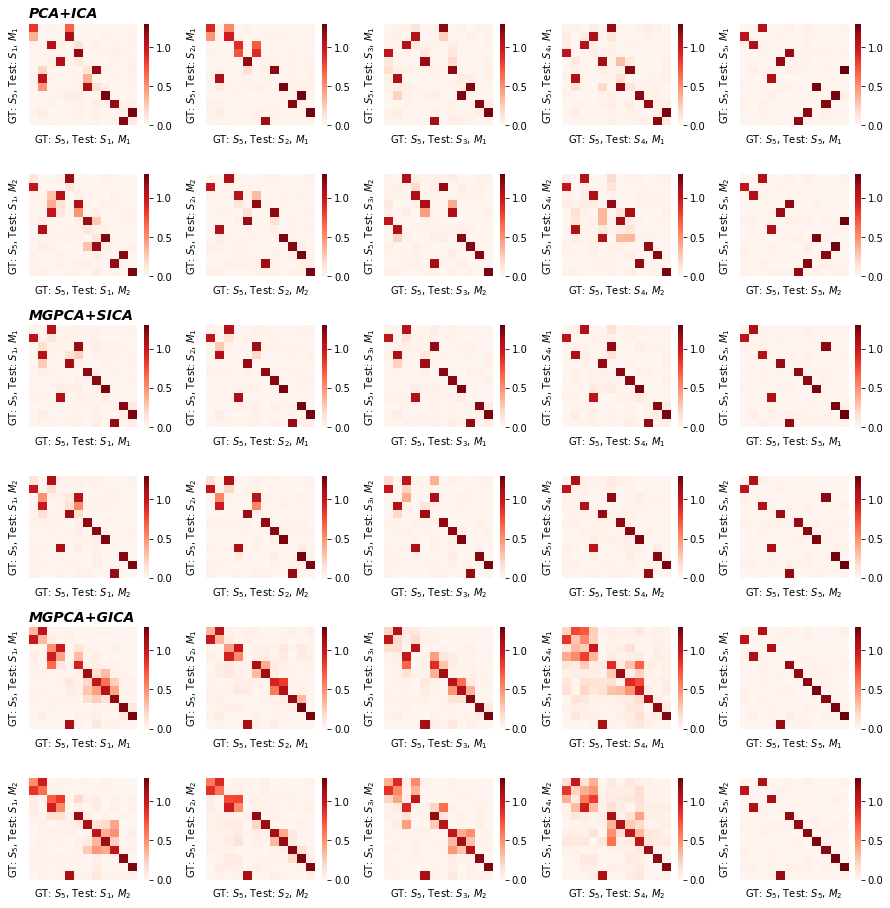

In [36]:
corrabsmax = np.max(np.abs(corr))
analysis_list = ["UA"]*2+["MSIVA"]*2+["MGPCA+GICA"]*2
fig, axes = plt.subplots(6,len(incorrect_subspace_struct_list),figsize=(2.5*len(incorrect_subspace_struct_list),2.12*6))
gt_id = incorrect_subspace_struct_list.index(correct_subspace_struct) + 1

for i in range(len(incorrect_subspace_struct_list)):
    for j in range(6):
        sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=corrabsmax,ax=axes[j,i])
        axes[j,i].set_xlabel(f"GT: $S_{gt_id}$, Test: $S_{i+1}$, $M_{j%2+1}$")
        axes[j,i].set_ylabel(f"GT: $S_{gt_id}$, Test: $S_{i+1}$, $M_{j%2+1}$")
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            axes[j,i].set_title("PCA+ICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 2:
            axes[j,i].set_title("MGPCA+ICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 4:
            axes[j,i].set_title("MGPCA+GICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")

plt.tight_layout()
plt.savefig(f"simulation_absWA_gica_iva_gtS{gt_id}.pdf")

In [2]:
# ground truth vs test
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
correct_subspace_struct_list=['234111','2222211','333111','441111','12x1']
incorrect_subspace_struct='12x1'

Y = np.zeros((len(correct_subspace_struct_list),3,2,12,3000)) # S1-4, UA/MSIVA/GICA, M1-2, voxel, source
corr = np.zeros((len(correct_subspace_struct_list),9,12,12))

for i,ss in enumerate(correct_subspace_struct_list):

    if ss!=incorrect_subspace_struct: 
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{incorrect_subspace_struct}","um_Y.mat"))
    else:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um_Y.mat"))
    Y1=np.squeeze(data['Y1'])

    if ss!=incorrect_subspace_struct: 
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{incorrect_subspace_struct}","ummm_Y.mat"))
    else:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm_Y.mat"))
    Y2=np.squeeze(data['Y2'])

    if ss!=incorrect_subspace_struct: 
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{incorrect_subspace_struct}","mm_Y.mat"))
    else:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","mm_Y.mat"))
    Y3=np.squeeze(data['Y3'])

    Y[i,0,0]=Y1[0]
    Y[i,0,1]=Y1[1]
    Y[i,1,0]=Y2[0]
    Y[i,1,1]=Y2[1]
    Y[i,2,0]=Y3[0]
    Y[i,2,1]=Y3[1]

    corr[i,0] = np.corrcoef(Y1[0],Y1[0])[:12,:12]
    corr[i,1] = np.corrcoef(Y1[1],Y1[1])[:12,:12]
    corr[i,2] = np.corrcoef(Y1[0],Y1[1])[12:,:12]

    corr[i,3] = np.corrcoef(Y2[0],Y2[0])[:12,:12]
    corr[i,4] = np.corrcoef(Y2[1],Y2[1])[:12,:12]
    corr[i,5] = np.corrcoef(Y2[0],Y2[1])[12:,:12]

    corr[i,6] = np.corrcoef(Y3[0],Y3[0])[:12,:12]
    corr[i,7] = np.corrcoef(Y3[1],Y3[1])[:12,:12]
    corr[i,8] = np.corrcoef(Y3[0],Y3[1])[12:,:12]

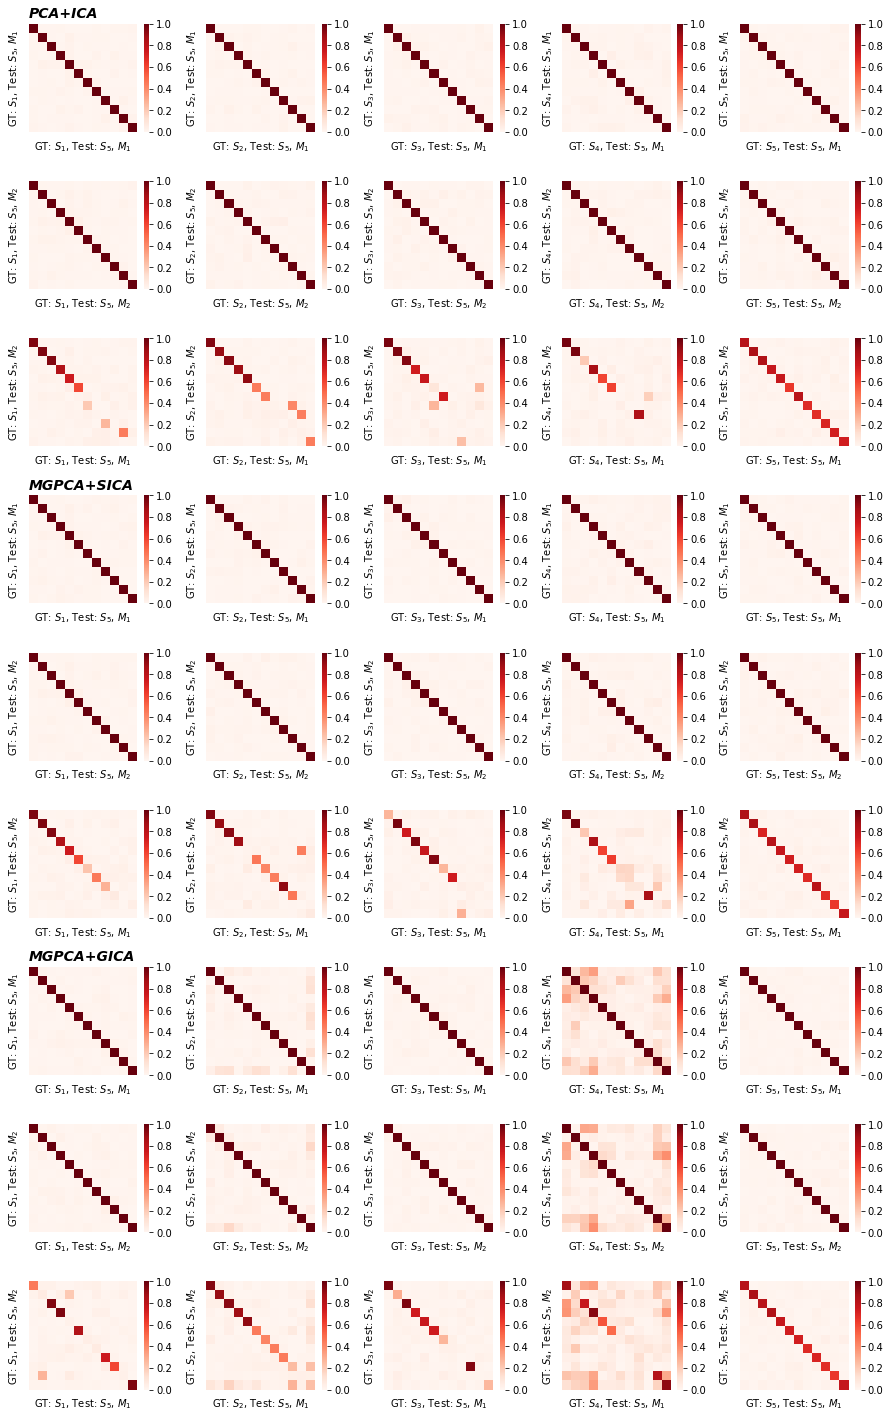

In [56]:
analysis_list = ["PCA+ICA"]*3+["MGPCA+ICA"]*3+["MGPCA+GICA"]*3

fig,axes=plt.subplots(9,len(correct_subspace_struct_list),figsize=(2.5*len(correct_subspace_struct_list),2.2*9))

for i in range(len(correct_subspace_struct_list)):
    for j in range(9):
        if j == 2 or j == 5 or j == 8:
            sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=1,ax=axes[j,i])
            axes[j,i].set_xlabel(f"GT: $S_{i+1}$, Test: $S_5$, $M_1$")
            axes[j,i].set_ylabel(f"GT: $S_{i+1}$, Test: $S_5$, $M_2$")
        else:
            sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=1,ax=axes[j,i])
            axes[j,i].set_xlabel(f"GT: $S_{i+1}$, Test: $S_5$, $M_{j%3+1}$")
            axes[j,i].set_ylabel(f"GT: $S_{i+1}$, Test: $S_5$, $M_{j%3+1}$")
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            axes[j][i].set_title(analysis_list[j], loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 3:
            axes[j][i].set_title(analysis_list[j], loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 6:
            axes[j][i].set_title(analysis_list[j], loc="left", fontsize=14, fontstyle="italic", fontweight="bold")

plt.tight_layout()
plt.savefig("simulation_absY_gica_iva_incorrectS5.pdf")

In [5]:
# ground truth vs test
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
correct_subspace_struct='441111'
incorrect_subspace_struct_list=['234111','2222211','333111','441111','12x1']

Y = np.zeros((len(incorrect_subspace_struct_list),3,2,12,3000)) # S1-4, UA/MSIVA/GICA, M1-2, voxel, source
corr = np.zeros((len(incorrect_subspace_struct_list),9,12,12))

for i,ss in enumerate(incorrect_subspace_struct_list):

    if ss!=correct_subspace_struct: 
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}_incorrect{ss}","um_Y.mat"))
    else:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}","um_Y.mat"))
    Y1=np.squeeze(data['Y1'])

    if ss!=correct_subspace_struct: 
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}_incorrect{ss}","ummm_Y.mat"))
    else:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}","ummm_Y.mat"))
    Y2=np.squeeze(data['Y2'])

    if ss!=correct_subspace_struct: 
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}_incorrect{ss}","mm_Y.mat"))
    else:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{correct_subspace_struct}","mm_Y.mat"))
    Y3=np.squeeze(data['Y3'])

    Y[i,0,0]=Y1[0]
    Y[i,0,1]=Y1[1]
    Y[i,1,0]=Y2[0]
    Y[i,1,1]=Y2[1]
    Y[i,2,0]=Y3[0]
    Y[i,2,1]=Y3[1]

    corr[i,0] = np.corrcoef(Y1[0],Y1[0])[:12,:12]
    corr[i,1] = np.corrcoef(Y1[1],Y1[1])[:12,:12]
    corr[i,2] = np.corrcoef(Y1[0],Y1[1])[12:,:12]

    corr[i,3] = np.corrcoef(Y2[0],Y2[0])[:12,:12]
    corr[i,4] = np.corrcoef(Y2[1],Y2[1])[:12,:12]
    corr[i,5] = np.corrcoef(Y2[0],Y2[1])[12:,:12]

    corr[i,6] = np.corrcoef(Y3[0],Y3[0])[:12,:12]
    corr[i,7] = np.corrcoef(Y3[1],Y3[1])[:12,:12]
    corr[i,8] = np.corrcoef(Y3[0],Y3[1])[12:,:12]

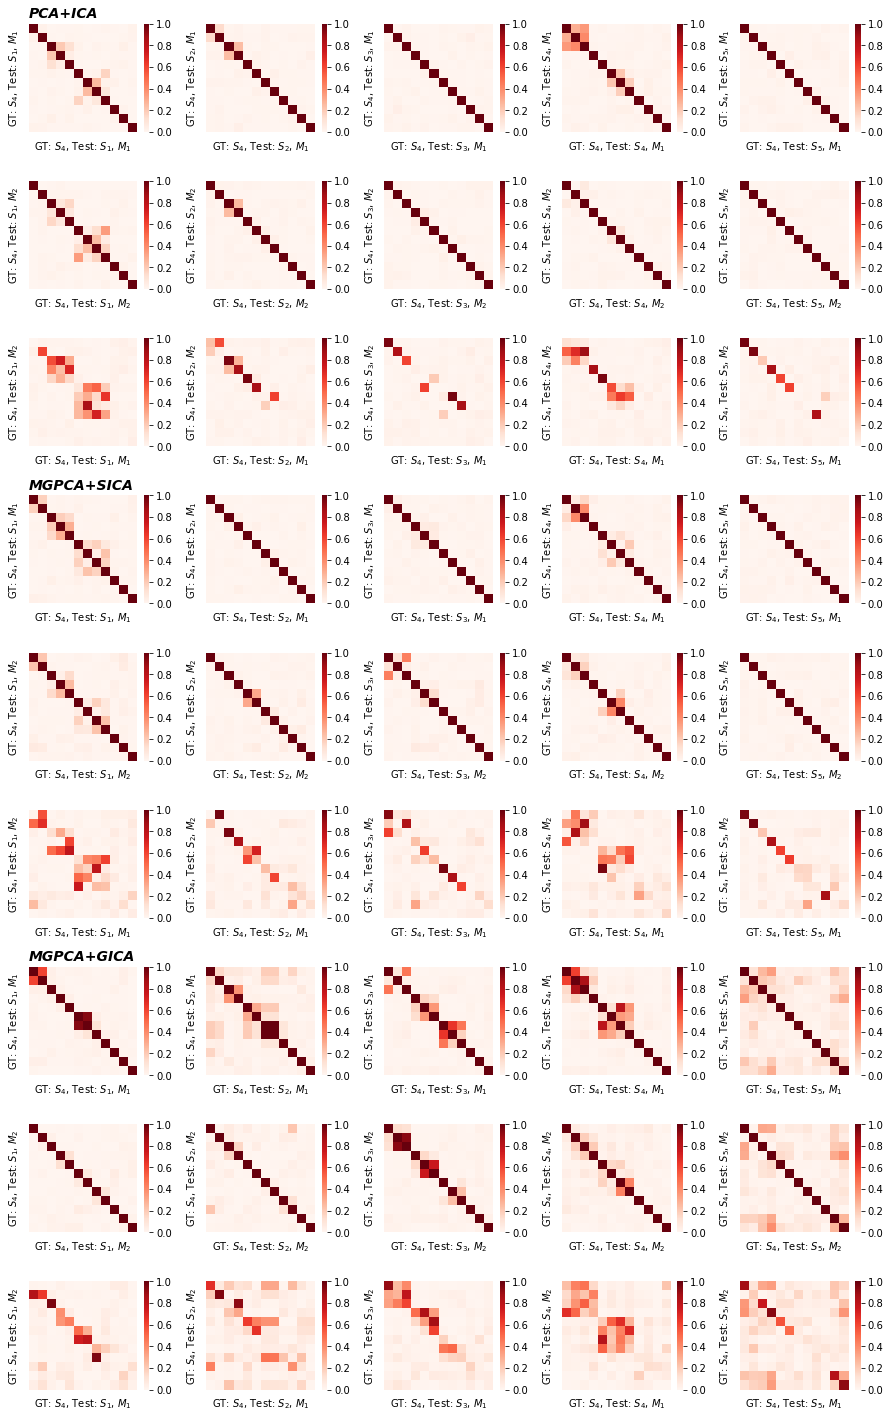

In [7]:
analysis_list = ["PCA+ICA"]*3+["MGPCA+ICA"]*3+["MGPCA+GICA"]*3

fig,axes=plt.subplots(9,len(incorrect_subspace_struct_list),figsize=(2.5*len(incorrect_subspace_struct_list),2.2*9))

for i in range(len(incorrect_subspace_struct_list)):
    for j in range(9):
        if j == 2 or j == 5 or j == 8:
            sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=1,ax=axes[j,i])
            axes[j,i].set_xlabel(f"GT: $S_4$, Test: $S_{i+1}$, $M_1$")
            axes[j,i].set_ylabel(f"GT: $S_4$, Test: $S_{i+1}$, $M_2$")
        else:
            sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=1,ax=axes[j,i])
            axes[j,i].set_xlabel(f"GT: $S_4$, Test: $S_{i+1}$, $M_{j%3+1}$")
            axes[j,i].set_ylabel(f"GT: $S_4$, Test: $S_{i+1}$, $M_{j%3+1}$")
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            axes[j][i].set_title(analysis_list[j], loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 3:
            axes[j][i].set_title(analysis_list[j], loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 6:
            axes[j][i].set_title(analysis_list[j], loc="left", fontsize=14, fontstyle="italic", fontweight="bold")

plt.tight_layout()
plt.savefig("simulation_absY_gica_iva_gtS4.pdf")